In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,8)

from ipywidgets import interact, IntSlider, fixed, FloatSlider

# Методы обучения без учителя (Unsupervised learning)
## Кластеризация
### Цели кластерного анализа

* **Поиск структуры** в данных и ее **интерпретация**
* Поиск аномальных объектов
* Детальный анализ отдельных кластеров
* Формирование признаков на основе кластеризации

### Алгоритм k-means 

* Дано множество объектов $X = \{x_1, x_2, \dots, x_N\}$
* Кластер $C_k \Leftrightarrow \text{ центроид } \mu_k$
* Объект $x_i \in C_k \Leftrightarrow \mu_k = \arg \min\limits_{\mu_j} \|x_i - \mu_j \|^2$
* Надо найти такое разбиение на $K$ кластеров, чтобы минизировать
$$ L(C) = \sum_{k=1}^K\sum_{i\in C_k} ||x_i - \mu_k||^2 \rightarrow \min\limits_C $$
$$\mu_k = \frac{1}{|C_k|} \sum _{x_n \in C_k} x_n$$

#### Алгоритм:

1. Выбрать $K$ начальных центроидов случайным образом  $\rightarrow \mu_k, \ k=1\dots K$
2. Для каждой точки из датасета присвоить кластер, соответствующий ближайшему центроиду
$$C_k = \{x_n : ||x_n - \mu_k||^2 \leq ||x_n - \mu_l||^2 \quad \forall l \neq k \} $$
3. Обновить центроиды: 
$$\mu_k = \frac{1}{|C_k|} \sum _{x_n \in C_k} x_n$$
4. Повторять 2 и 3 до тех пор, пока изменения перестанут быть существенными

<center><img src='./images/Kmeans_animation.gif' width=500></center>

#### Гиперпараметры
* Способ инициализации центроидов
* Количество кластеров

### Elbow method (Метод локтя)

* Критерий минимизации k-means
$$ L(C) = \sum_{k=1}^K\sum_{i\in C_k} ||x_i - \mu_k||^2 \rightarrow \min\limits_C $$
* Давайте возьмем всевозможные $K$, для каждого запустим алгоритм, посчитаем на результате $L(C)$ и выберем минимум!
* Что может пойти не так?

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 


crit = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    crit.append(np.sqrt(kmeans.inertia_))
    
def elbow_demo(k=2):
    
    X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 
    
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    
    fig, ax = plt.subplots(1,2)
    
    ax[0].scatter(X[:,0], X[:,1], c=kmeans.labels_)
    
    ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                  marker='o', c="white", alpha=1, s=200)
    
    ax[0].set_xlabel('$x_1$')
    ax[0].set_ylabel('$x_2$')

    for i, c in enumerate(kmeans.cluster_centers_):
        ax[0].scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
        
    ax[1].plot(range(2,8), crit, marker='s')
    
    ax[1].set_xlabel('$k$')
    ax[1].set_ylabel('$L^{(k)}(C)$')
    
    plt.show()

/Users/goldsteyn.kd/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/goldsteyn.kd/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/goldsteyn.kd/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/goldsteyn.kd/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/cluster/

### Elbow method (Метод локтя)

* Выбирают такое $k$, после которого функционал $L(C)$ уменьшается не слишком быстро
* Чуть более формально:
$$ D(k) = \frac{|L^{(k)}(C) - L^{(k+1)}(C)|}{|L^{(k-1)}(C) - L^{(k)}(C)|} \leq \varepsilon  $$

In [9]:
plot = interact(elbow_demo, k=IntSlider(min=2,max=8,step=1,value=2))

interactive(children=(IntSlider(value=2, description='k', max=8, min=2), Output()), _dom_classes=('widget-inte…

### Начальная инициализация центроидов
* Выбрать координаты $K$ случайных объектов из датасета
    * Производить случайные запуски много раз и выбрать наиболее оптимальную инициализацию
* Использовать результат другой кластеризации на $K$ кластеров
* k-means++

### K-means++
* Первый центроид выбираем случайным образом из объектов датасета
* Для каждой точки рассчитываем расстояние $d_{\min}(x_i) = \min_{\mu_j} \|x_i - \mu_j\|^2$
* Точка назначается следующим центройдом с вероятностью $p(x_i) \propto d_{\min}(x_i)$

In [40]:
from sklearn.metrics import pairwise_distances

def demo_kmpp(iters=1):

    X, y = make_blobs(n_samples=550, cluster_std=1.5, n_features=2, centers=5, random_state=12345)

    X_grid1, X_grid2 = np.meshgrid(np.linspace(-12, 18, 500),
                                   np.linspace(-11, 8, 500))

    XX = np.c_[X_grid1.flatten(), X_grid2.flatten()]
    np.random.seed(1)
    centroids = np.empty((0, 2))

    for i in range(iters):
        if i == 0:
            d = np.ones_like(y, dtype=float)
        else:
            d = pairwise_distances(X, centroids, metric='euclidean').min(axis=1)
        weights = d/d.sum()

        centroid_idx = np.random.choice(X.shape[0], size=1, replace=False, p=weights)[0]
        centroids = np.r_[centroids, X[centroid_idx, np.newaxis]]

    d_grid = pairwise_distances(XX, centroids, metric='euclidean').min(axis=1)

    d_grid = d_grid.reshape(X_grid1.shape)
    d_grid = d_grid/d_grid.max()

    levels = np.linspace(0, 1, 100)

    plt.contourf(X_grid1, X_grid2, d_grid, cmap=plt.cm.Blues, alpha=0.7, levels=levels)
    plt.scatter(X[:, 0], X[:, 1], s=100)

    centers = centroids
    
    plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=500, edgecolor='k')

    for i, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker='$%d$' % (i+1), alpha=1,
                    s=100, edgecolor='k')

    plt.xlabel('$x_1$', fontsize=15)
    plt.ylabel('$x_2$', fontsize=15)

    plt.tight_layout()
    plt.axis('equal')
    plt.show()

In [41]:
interact(demo_kmpp, iters=IntSlider(min=1,max=6,step=1,value=1))

interactive(children=(IntSlider(value=1, description='iters', max=6, min=1), Output()), _dom_classes=('widget-…

<function __main__.demo_kmpp(iters=1)>

### Итог

* Метод k-средних – жадный итеративный алгоритм
* Зависит от начальных центройдов и их количества

#### Преимущества
* Очень простой
* Можно довольно разнообразно модифицировать
* Интерпетировать/представлять кластеры можно через центроиды

#### Недостатки

* Подразумевает выпуклые кластеры
* Требует $K$ в явной форме, что не всегда хорошо

<center><img src='./images/kmeans_2moons.png' width=800></center>

### DBSCAN

DBSCAN (Density-based spatial clustering of applications with noise, но это запоминать не надо) это принципиально другой алгоритм кластеризации, который можно отнести к типу "Алгоритмы, основанные на плотности". Его идея в том, чтобы получить кластеры высокой плотности, разделеные участками низкой плотности.

<center><img src='./images/dbscan.png'></center>

#### Схема:
* Для каждой точки кластера её окрестность заданного радиуса $\varepsilon$ должна содержать не менее некоторого числа точек `min_pts`. 
* C такой точки можно начать расширение "плотного" кластера 
    * то есть каждая точка в $\varepsilon$ окрестности будет добавляться в кластер
    * ее соседи тоже будут проверяться на критерий `min_pts`
* Расширение текущего кластера закончится, когда объекты перестанут удовлетворять условию `min_pts`

[Но лучше просто посмотреть](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)


#### Типы точек
* Core point: точки, в $\varepsilon$-окрестности которых $\ge$ `min_pts` точек
* Border point: не core, но содержит хотя бы 1 core точку в $\varepsilon$-окрестности
* Noise point: остальное

Алгоритм сводится к тому, чтобы расширять границу, пока это возможно. То есть на каждом шаге непомеченные точки в некотором радиусе от граничных мы красим и добавляем в граничные точки нашего множества, а граничные точки проверяем на то, можем ли мы их перевести в core.

<center><img src='./images/dbscan_points_types.png'></center>

In [15]:
from sklearn.cluster import DBSCAN


data = np.loadtxt('./data/flame.txt')
X_data = data[:, :2]

def dbscan_demo(eps=1, min_pts=5):
    
    dbscan = DBSCAN(eps=eps, min_samples=min_pts).fit(X_data)
    
    labels = dbscan.labels_
    
    plt.figure(figsize=(7,5))
    plt.scatter(X_data[:,0], X_data[:, 1], c=labels)
    
    plt.show()
    

In [16]:
interact(dbscan_demo, eps=FloatSlider(min=0.1, max=10, step=0.05, value=1), min_pts=IntSlider(min=2, max=15, step=1, value=5))

interactive(children=(FloatSlider(value=1.0, description='eps', max=10.0, min=0.1, step=0.05), IntSlider(value…

<function __main__.dbscan_demo(eps=1, min_pts=5)>

### Итог

#### Преимущества
* Не требует $K$
* Кластеры произвольной формы
* Учитывает выбросы

#### Недостатки
* Плохо работает при различных плотностях кластеров
* Может не выявить кластеры

<center><img src='./images/diff-dens.png'></center>

### Оценка качества кластеризации

* Измеряют полученое разбиение по отношению к качествам условно хорошей кластеризации
    * Компактность объектов внутри кластера
    * Разделимость кластеров друг от друга
 
#### Пример: критерий Silhouette

Пусть дана кластеризация в $K$ кластеров, и объект $i$ попал в $C_k$

* $a(i)$ -- среднее расстояние от $i$ объекта до объектов из $C_k$
* $b(i) = min_{j \neq k} b_j(i)$,  где $b_j(i)$ -- среднее расстояние от $i$ объекта до объектов из $C_j$
$$
silhouette(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$
Средний silhouette для всех точек из $\mathbf{X}$ является критерием качества кластеризации (чем больше, тем лучше).


Больше можно прочитать [тут](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation) 

## Методы понижения размерности

### Для чего можно понижать размерность признаков?

* Cмотреть на 2-3 признака удобнее чем на 100
* Потенциально может улучшить качество моделей
* Удаление лишних коррелирующих признаков
* Ускоряет обучение
* Данные занимают меньше места
* Меньше признаков - легче интерпретировать модели

Совсем глобально подхода два: избавляться от размерности можно методами **отбора признаков (Feature Selection)** и методами **уменьшения размерности (Feature Reduction)**
* Feature Selection: не используем часть признаков
* Feature Reduction: исходные признаки проходят через некоторое преобразование $f(\cdot)$, и на выходе признаков становится меньше

### Principal Component Analysis

#### Схема:

* Совершаем переход к новым осям, так что:
    * Новые переменные являются линейной комбинацией старых переменных
    * Новые оси ортогональны друг другу
    * Дисперсия вдоль новых осей максимальная
 
NB: Если вы задавались вопросом, как численно делается SVD для PCA, то линальская магия сводит это к поиску спектра ковариационной матрицы (W ниже -- матрица собственных векторов): 

<center><img src='images/pca_svd.png' width=900></center>

In [30]:
### Условная реализация PCA
import numpy as np

# Генерируем случайные данные (матрица X)
np.random.seed(0)
X = np.random.rand(100, 3)

# Вычисляем среднее значение для центрирования данных
mean = np.mean(X, axis=0)

# Вычисляем ковариационную матрицу
cov_matrix = np.cov(X.T)

# Вычисляем собственные значения и собственные векторы
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Сортируем собственные значения в порядке убывания
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Вычисляем главные компоненты (проекции данных на новое пространство)
principal_components = np.dot(X - mean, sorted_eigenvectors)

# Вычисляем объясненную дисперсию для каждой компоненты
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)

# Процент объясненной дисперсии для первых n компонент
explained_variance_ratio = np.cumsum(explained_variance)

# Процент объясненной дисперсии для каждой компоненты
explained_variance_ratio = np.cumsum(explained_variance)

# Находим количество компонент, объясняющих не менее 95% дисперсии
num_components = np.argmax(explained_variance_ratio >= 0.95) + 1

# Проекция данных на новое пространство
reduced_data = np.dot(X - mean, sorted_eigenvectors[:, :num_components])

### t-SNE

#### Идея
* Перейти в пространство меньшей размерности так, чтобы расстояния между объектами в новом пространстве были подобны расстояниям в исходном пространстве.
* Дано $X = [x_1,\dots, x_n]\in \mathbb{R}^{N \times D}$ и/или $\delta_{ij}$ - мера близости между $(x_i,x_j)$
* Надо найти $Y = [y_1,\dots,y_n] \in \mathbb{R}^{N \times d}$ такие, что $\delta_{ij} \approx d(y_i, y_j) = \|y_i-y_j\|^2$

Такой подход называется многомерным шкалированием, t-SNE (t-distributed Stochastic Neighbor Embedding) -- вариация на тему.

<center><img src='images/mds.png' width =1200></center>


* t-SNE вместо вышеописанного пытается перенести "окрестность" точек из исходного пространства в пространоство меньшей размерности
* Полученные расстояния скорее всего не будут соотносится с исходными

* Схожесть между объектами в исходном пространстве $\mathbb{R}^m$
$$
p(i, j) = \frac{p(i | j) + p(j | i)}{2n}, \quad p(j | i) = \frac{\exp(-\|\mathbf{x}_j-\mathbf{x}_i\|^2/{2 \sigma_i^2})}{\sum_{k \neq i}\exp(-\|\mathbf{x}_k-\mathbf{x}_i\|^2/{2 \sigma_i^2})}
$$
$\sigma_i$ неявно задается пользователем
* Схожесть между объектами в целевом пространстве $\mathbb{R}^k, k << m$
$$
q(i, j) = \frac{g(|\mathbf{y}_i - \mathbf{y}_j|)}{\sum_{k \neq l} g(|\mathbf{y}_i - \mathbf{y}_j|)}
$$ 
где $g(z) = \frac{1}{1 + z^2}$ - распределение Коши (t-распределение Стьюдента с 1 степенью свободы)
* Критерий
$$
J_{t-SNE}(y) = KL(P \| Q) = \sum_i \sum_j p(i, j) \log \frac{p(i, j)}{q(i, j)} \rightarrow \min\limits_{\mathbf{y}}
$$

#### Дивергенция/расстояние Кульбака-Лейблера

* Насколько распределение $P$ отличается от распределения $Q$?
$$
KL(P \| Q) = \sum_z P(z) \log \frac{P(z)}{Q(z)}
$$
* В случае непрерывных распределений сумма меняется на интеграл
* Обратите внимание, что оно некоммутативно, а еще не удовлетворяет неравенству треугольника. Эти два факта мешают ему быть метрикой в пространстве распределений, хотя очень хочется.
* Еще встретится в нейросетях

<center><img src='images/kld.png' width=1200></center>



#### Стоп, а что делать-то в итоге?

* Конечно, оптимизировать $J_{t-SNE}(y)$ с помощью градиентного спуска

$$\frac{\partial J_{t-SNE}}{\partial y_i}=4 \sum_j(p(i,j)−q(i,j))(y_i−y_j)g(|y_i−y_j|)$$

чтобы в итоге получить оптимальное положение для каждой точки в новом пространстве. Это занимает немало времени в сравнении с другими алгоритмами понижения размерности. Поиграться можно [здесь](http://distill.pub/2016/misread-tsne/).

In [ ]:
### Условная реализация t-SNE
from sklearn.metrics import pairwise_distances
from scipy import exp

# Вычисляем матрицу попарных расстояний между объектами
distance_matrix = pairwise_distances(X, metric='euclidean')

# Вычисляем условные вероятности сходства
P = np.exp(-distance_matrix ** 2 / (2 * (sigma ** 2)))
P /= np.sum(P, axis=1, keepdims=True)  # Нормализуем вероятности

# Инициализируем распределение вероятностей Q для целевого пространства
Q = np.ones((n_samples, n_samples)) / n_samples

# Оптимизируем функцию Кульбака-Лейблера KL(P||Q)
for iteration in range(n_iter):
    # Вычисляем распределение вероятностей Q для целевого пространства
    Q = 1 / (1 + distance_matrix ** 2) / np.sum(1 / (1 + distance_matrix ** 2), axis=1, keepdims=True)
    
    # Обновляем координаты точек в целевом пространстве
    y = y + learning_rate * np.sum((P - Q)[:, :, np.newaxis] * (y[:, np.newaxis, :] - y), axis=0)

### Автоэнкодеры

Это подход, связанный с нейронными сетями. Его подробно мы обсудим позже, но стоит запомнить, что существуют нейросети, сжимающие пространство признаков в пространство меньшей размерности с минимальной потерей информации.

## Пример

In [42]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

# Загрузка датасета MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Преобразуем метки в целые числа
y = y.astype(np.uint8)

# Возьмем только половину выборки для демонстрации, чтобы t-sne работал побыстрее
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

/Users/goldsteyn.kd/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Worktime =  3.076507806777954 s


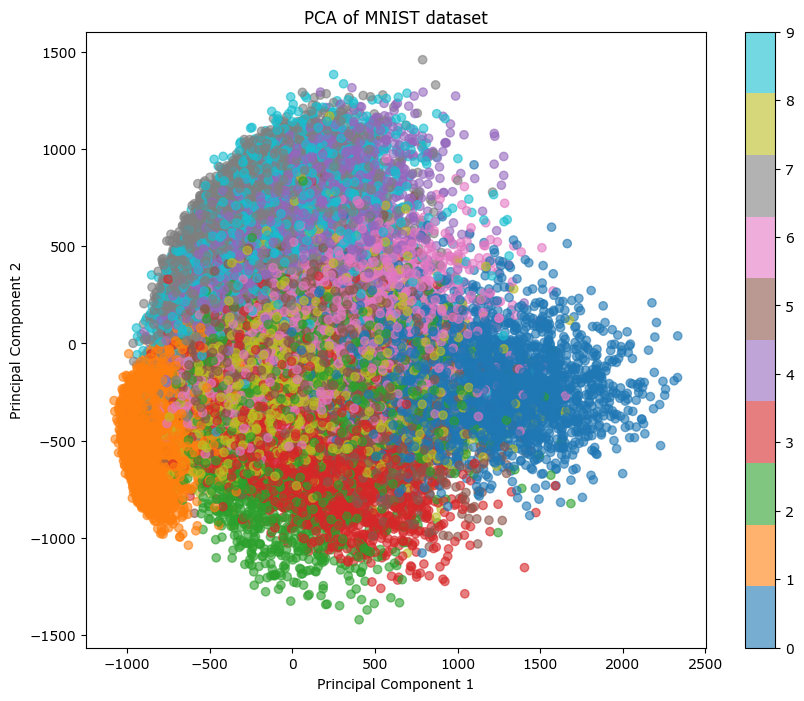

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import time

t = time.time()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
print('Worktime = ', time.time()-t, 'sec')
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='tab10', alpha=0.6)
plt.colorbar()
plt.title('PCA of MNIST dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Worktime =  93.17011380195618 sec


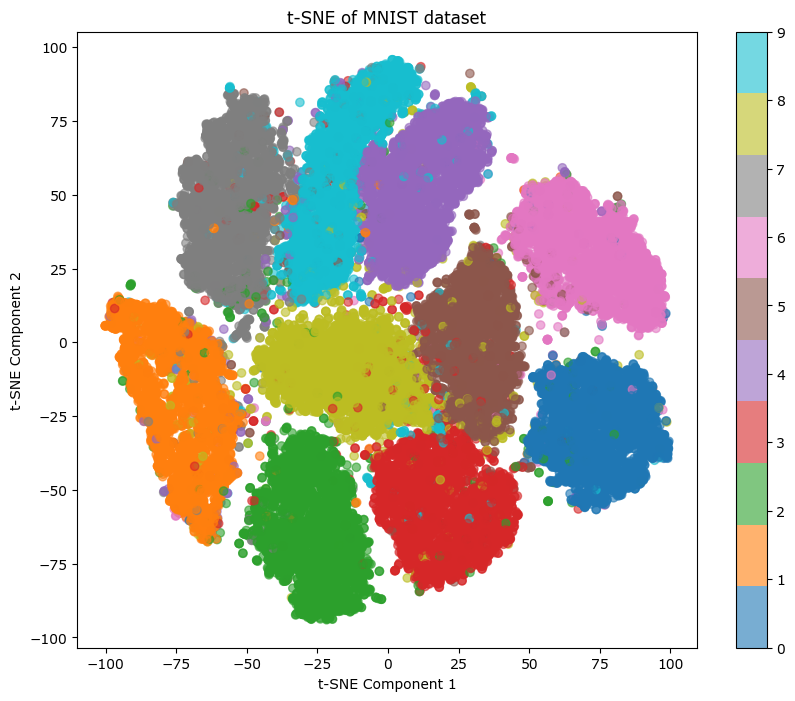

In [43]:
from sklearn.manifold import TSNE

t = time.time()
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)
print('Worktime = ', time.time()-t, 'sec')
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='tab10', alpha=0.6)
plt.colorbar()
plt.title('t-SNE of MNIST dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()